# 2.4: Fundamentals of Visualization Libraries Part 2

## Imports & Settings

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

ModuleNotFoundError: No module named 'keplergl'

In [4]:
sns.set_theme(style = "darkgrid", palette = "Blues_r")

In [5]:
data = pd.read_parquet("2022_Citibike_Dataset.parquet", engine = "pyarrow")

In [6]:
df = data.assign(
    date = data["started_at"].dt.date,
    year = data["started_at"].dt.year
)

In [7]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source,avgTempCelsius,date,year
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,202201-citibike-tripdata_1,-6.0,2022-01-21,2022
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,202201-citibike-tripdata_1,1.6,2022-01-10,2022
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,202201-citibike-tripdata_1,-2.3,2022-01-26,2022
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,202201-citibike-tripdata_1,1.4,2022-01-03,2022
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,202201-citibike-tripdata_1,-5.9,2022-01-22,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838801,1F223EDAFF420AE3,electric_bike,2022-12-01 20:26:45.847,2022-12-01 20:30:46.012,Avenue D & E 3 St,5436.09,Stanton St & Chrystie St,5523.02,40.720701,-73.977939,40.722293,-73.991475,member,202212-citibike-tripdata_2,5.7,2022-12-01,2022
29838802,CFA5C560ACB73B8E,classic_bike,2022-12-26 13:46:34.237,2022-12-26 13:52:43.900,43 Ave & 47 St,6209.05,39 Ave & 45 St,6401.03,40.744806,-73.917290,40.749478,-73.918265,member,202212-citibike-tripdata_2,-4.7,2022-12-26,2022
29838803,11C8C5E0DB947B07,classic_bike,2022-12-01 05:56:14.903,2022-12-01 06:06:10.357,Avenue D & E 3 St,5436.09,Bleecker St & Crosby St,5679.08,40.720828,-73.977932,40.726156,-73.995102,member,202212-citibike-tripdata_2,5.7,2022-12-01,2022
29838804,5B9B083C534A5964,classic_bike,2022-12-02 11:54:15.871,2022-12-02 12:01:00.747,Montague St & Clinton St,4677.06,Sands St & Jay St,4821.03,40.694271,-73.992327,40.700119,-73.986200,member,202212-citibike-tripdata_2,3.4,2022-12-02,2022


## Top 20 Start Stations - Bar Chart

### Create Dataframe

In [10]:
top_stations_df = df["start_station_name"].value_counts().reset_index().head(20)
top_stations_df

,start_station_name,count
0,W 21 St & 6 Ave,129018
1,West St & Chambers St,123291
2,Broadway & W 58 St,114293
3,6 Ave & W 33 St,106445
4,1 Ave & E 68 St,104856
5,Broadway & E 14 St,98866
6,Broadway & W 25 St,98425
7,University Pl & E 14 St,97126
8,Broadway & E 21 St,95691
9,W 31 St & 7 Ave,94208


### Plot Chart

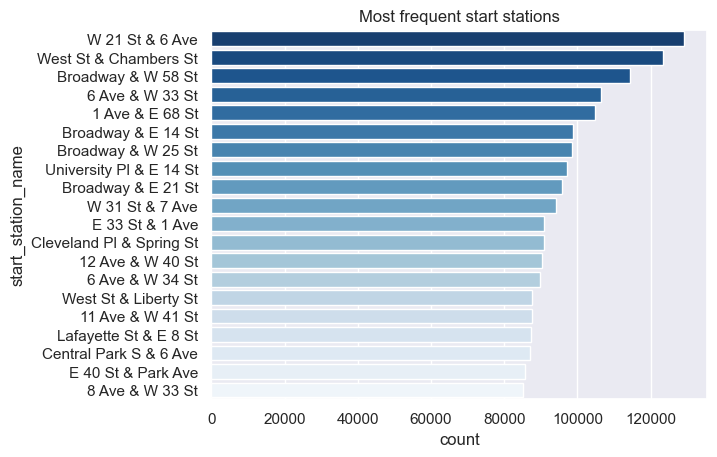

In [12]:
sns.barplot(
    data = top_stations_df, 
    x = "count", 
    y = "start_station_name", 
    hue = "start_station_name",
    palette = "Blues_r",
)

plt.title("Most frequent start stations")
plt.show()

## Trip Count Analysis

### Create Dataframe

In [15]:
# create temperature df
temp_df = \
(df
 .loc[:,["date","avgTempCelsius", "year"]]
 .drop_duplicates()
 .query("year == 2022")
 .drop(columns = ["year"])
 .set_index("date")
 .sort_index()
 .assign(rolling_temp = lambda df: df["avgTempCelsius"].rolling(window = 7, center = True).mean().round(1))
)

trip_count_df = \
(df
 .loc[:,["date","ride_id","year"]]
 .query("year == 2022")
 .drop(columns = ["year"])
 .groupby(['date'])['ride_id'].count()
 .reset_index()
 .set_index("date")
 .rename(columns = {"ride_id": "ride_count"})
 .assign(ride_count_rolling = lambda x: x["ride_count"].rolling(window = 7, center = True).mean().round(0))
 .merge(temp_df, left_index = True, right_index = True)
)

trip_count_df

,ride_count,ride_count_rolling,avgTempCelsius,rolling_temp
date,,,,
2022-01-01,20428,NaN,11.6,NaN
2022-01-02,43009,NaN,11.4,NaN
2022-01-03,33189,NaN,1.4,NaN
2022-01-04,36842,32841.0,-2.7,4.4
2022-01-05,34230,33416.0,3.2,2.3
...,...,...,...,...
2022-12-27,33044,32996.0,-0.7,-0.7
2022-12-28,44027,35842.0,3.4,2.1
2022-12-29,51674,NaN,6.4,NaN


### Plot Graph

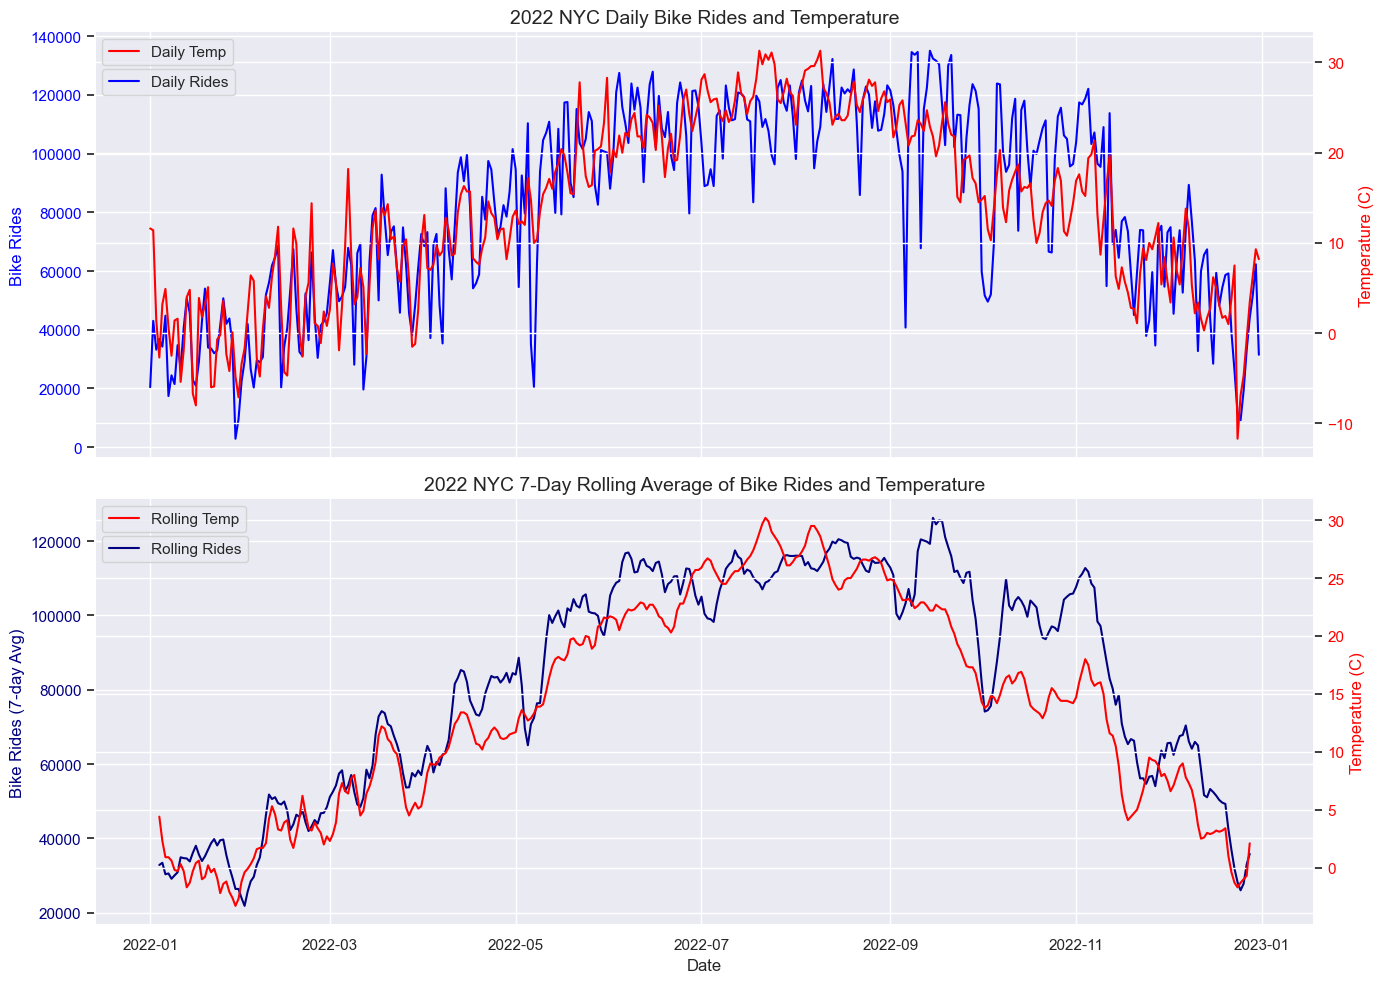

In [17]:
# create figure w/ 2 subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 10), sharex = True)


# subplot 1 - daily values 
ax1 = axes[0]

# twinx 1 - ride count
sns.lineplot(data = trip_count_df, x = trip_count_df.index, y = "ride_count", ax = ax1, color = "blue", label = "Daily Rides")
ax1.set_ylabel("Bike Rides", color = "blue", fontsize = 12)
ax1.tick_params(axis = "y", labelcolor = "blue")
ax1.set_title("2022 NYC Daily Bike Rides and Temperature", fontsize = 14)

# twinx 2 - temperature
ax1b = ax1.twinx()
sns.lineplot(data = trip_count_df, x = trip_count_df.index, y = "avgTempCelsius", ax = ax1b, color = "red", label = "Daily Temp")
ax1b.set_ylabel("Temperature (C)", color = "red", fontsize = 12)
ax1b.tick_params(axis = "y", labelcolor = "red")

# subplot 1 adjustments
ax1.legend(loc = "upper left", bbox_to_anchor = (0, 1 - 0.07))
ax1b.legend(loc = "upper left")


# subplot 2 - rolling average values
ax2 = axes[1]

# twinx 1 - ride count
sns.lineplot(data = trip_count_df, x = trip_count_df.index, y = "ride_count_rolling", ax = ax2, color="navy", label = "Rolling Rides")
ax2.set_ylabel("Bike Rides (7-day Avg)", color = "navy", fontsize = 12)
ax2.tick_params(axis = "y", labelcolor = "navy")
ax2.set_title("2022 NYC 7-Day Rolling Average of Bike Rides and Temperature", fontsize = 14)
ax2.set_xlabel("Date", fontsize = 12)

# twinx 2 - temperature
ax2b = ax2.twinx()
sns.lineplot(data = trip_count_df, x = trip_count_df.index, y = "rolling_temp", ax = ax2b, color = "red", label = "Rolling Temp")
ax2b.set_ylabel("Temperature (C)", color = "red", fontsize = 12)
ax2b.tick_params(axis = "y", labelcolor = "red")

# subplot 2 adjustments
ax2.legend(loc = "upper left", bbox_to_anchor = (0, 1 - 0.07))
ax2b.legend(loc = "upper left")


# final adjustments
plt.tight_layout()
plt.show()

## Member Status Analysis - Box Plot 

### Create Dataframe

In [20]:
member_df = \
(df
 .loc[:,["member_casual", "started_at", "ended_at"]]
 .assign(trip_duration = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round())
 .query("trip_duration > 0 and trip_duration <= 60")
 #.assign(trip_duration_log = lambda df: np.log1p(df["trip_duration"]))
 .drop(columns = ["started_at", "ended_at"])
)

member_df

,member_casual,trip_duration
0,member,9.0
1,member,11.0
2,member,14.0
3,member,35.0
4,member,21.0
...,...,...
29838801,member,4.0
29838802,member,6.0
29838803,member,10.0
29838804,member,7.0


In [21]:
pd.concat(
    [member_df.query("member_casual == 'member'")["trip_duration"].describe().to_frame(name = "Member"), 
     member_df.query("member_casual == 'casual'")["trip_duration"].describe().to_frame(name = "Casual"),
     member_df["trip_duration"].describe().to_frame(name = "All")], 
    axis=1).round(2)

,Member,Casual,All
count,23043954.00,6246620.00,29290574.00
mean,12.04,17.33,13.17
std,9.70,12.07,10.48
min,1.00,1.00,1.00
25%,5.00,8.00,6.00
50%,9.00,14.00,10.00
75%,16.00,23.00,17.00
max,60.00,60.00,60.00


### Plot Graph

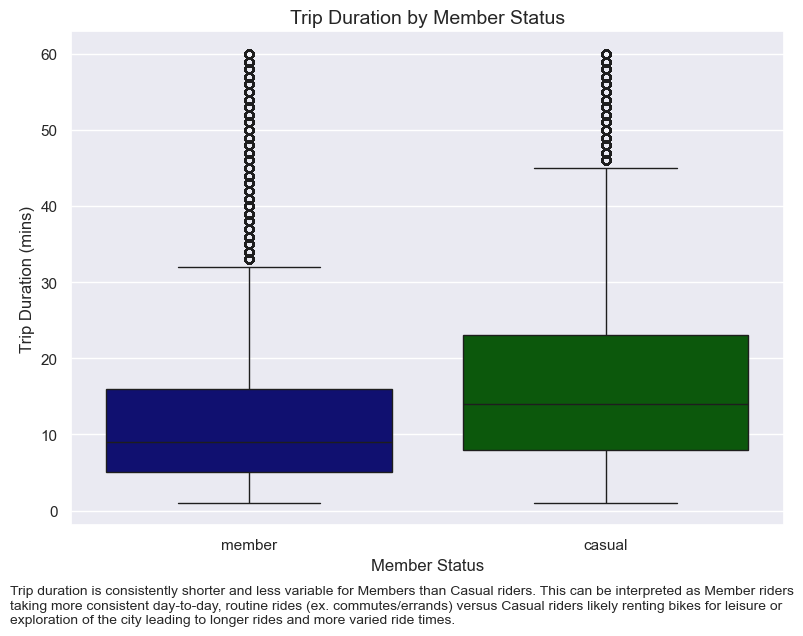

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x = "member_casual", 
    y = "trip_duration", 
    hue = "member_casual", 
    data = member_df, 
    palette = {"member": "Navy", "casual": "Darkgreen"}
)

plt.title("Trip Duration by Member Status", fontsize = 14)
plt.xlabel("Member Status", fontsize = 12)
plt.ylabel("Trip Duration (mins)", fontsize = 12)

# bottom text
plt.figtext(
    0.01, -0.05,
    'Trip duration is consistently shorter and less variable for Members than Casual riders. This can be interpreted as Member riders taking more consistent day-to-day, routine rides (ex. commutes/errands) versus Casual riders likely renting bikes for leisure or exploration of the city leading to longer rides and more varied ride times.',
    ha = "left", 
    fontsize = 10,
    wrap = True
)

plt.tight_layout()
plt.show()

## Bike Type Analysis - Histograph FacetGrid

### Create Dataframe

In [26]:
rideable_df = \
(df
 .loc[:,["rideable_type", "started_at", "ended_at"]]
 .assign(trip_duration = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round())
 .query("trip_duration > 0 and trip_duration <= 120")
 .drop(columns = ["started_at", "ended_at"])
)

rideable_df

,rideable_type,trip_duration
0,electric_bike,9.0
1,classic_bike,11.0
2,electric_bike,14.0
3,classic_bike,35.0
4,classic_bike,21.0
...,...,...
29838801,electric_bike,4.0
29838802,classic_bike,6.0
29838803,classic_bike,10.0
29838804,classic_bike,7.0


In [27]:
pd.concat(
    [rideable_df.query("rideable_type == 'electric_bike'")["trip_duration"].describe().to_frame(name = "Electric Bike"), 
     rideable_df.query("rideable_type == 'classic_bike'")["trip_duration"].describe().to_frame(name = "Classic Bike"),
     rideable_df["trip_duration"].describe().to_frame(name = "All")],
    
    axis=1).round(2)

,Electric Bike,Classic Bike,All
count,11671241.00,17998441.00,29669682.00
mean,14.35,13.80,14.02
std,13.32,12.63,12.91
min,1.00,1.00,1.00
25%,6.00,6.00,6.00
50%,10.00,10.00,10.00
75%,18.00,18.00,18.00
max,120.00,120.00,120.00


### Create Graph

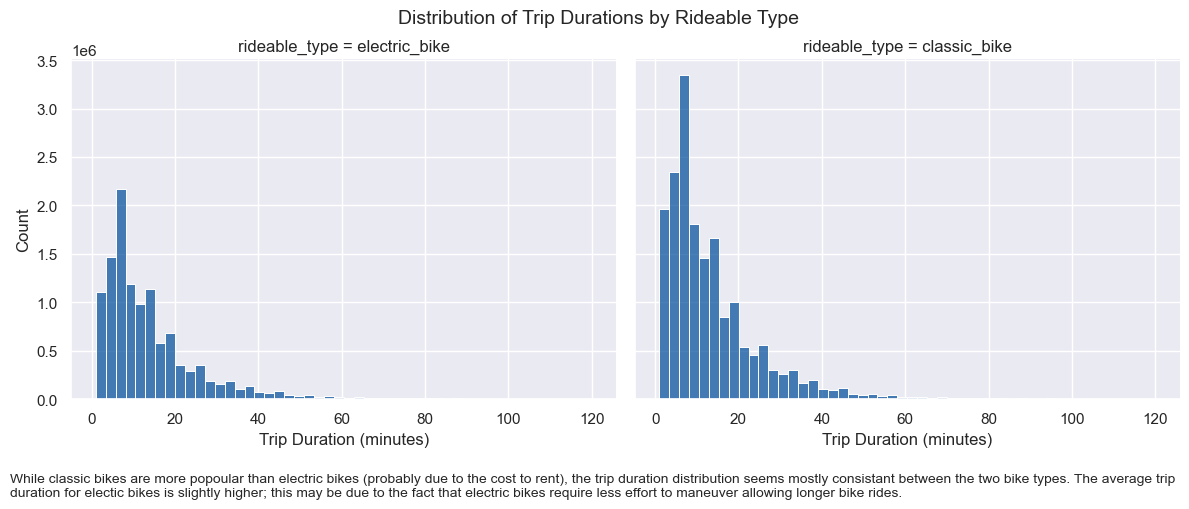

In [29]:
# facet grid
grid = sns.FacetGrid(
    rideable_df, 
    col = "rideable_type", 
    height = 5, 
    aspect = 1.2
)

grid.map(sns.histplot, "trip_duration", bins = 50)
grid.set_axis_labels("Trip Duration (minutes)", "Count")
grid.fig.suptitle("Distribution of Trip Durations by Rideable Type", fontsize = 14)

# bottom text
plt.figtext(
    0.01, 0.01, 
    "While classic bikes are more popoular than electric bikes (probably due to the cost to rent), the trip duration distribution seems mostly consistant between the two bike types. The average trip duration for electic bikes is slightly higher; this may be due to the fact that electric bikes require less effort to maneuver allowing longer bike rides.",
    ha = "left", 
    fontsize = 10, 
    wrap = True
)

# adjustments
plt.tight_layout()
plt.subplots_adjust(top = 0.88, bottom = 0.2)
plt.show()
